# Ford GoBike Data Exploration

In [11]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
Traceback (most recent call last):
  File "/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/anaconda3/lib/python3.7/site-packages/jupyter_core/application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "/opt/anaconda3/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/anaconda3/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 481, in convert_single_notebook
    output, resources = self.export_single_notebook(notebook_filename, resources, input_b

# Investigation Overview
#### In this investigation, I wanted to look at the trips duration in second


# Dataset Overview
#### This document explores a dataset containing Ford bike and attributes for approximately 1,768,919 Ford GoBike.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline


In [2]:
# load in the dataset into a pandas dataframe, print statistics
one_ford = pd.read_csv('201802-fordgobike-tripdata.csv') 
two_ford = pd.read_csv('201803-fordgobike-tripdata.csv') 
three_ford = pd.read_csv('201804-fordgobike-tripdata.csv') 
Ford = pd.concat([one_ford,two_ford,three_ford])

In [3]:
#The day and month in consideration for bike usage is the start date 
Ford ['start_time'] =  pd.to_datetime(Ford['start_time'], format='%Y-%m-%d')
#Ford['day'] = Ford['start_time'].apply(lambda d:d.day).astype(object)
#Ford['month'] = Ford['start_time'].apply(lambda m:m.month).astype(object)
#Ford.head(2)


In [4]:
Ford['day'] = Ford['start_time'].dt.strftime('%a')
Ford['month'] = Ford['start_time'].dt.strftime('%b')
Ford.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,day,month
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No,Wed,Feb
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No,Wed,Feb


# 1- What is the distribution of users types in Ford Bike data?
#### As what is shown the customer is the most intractive user using trips with duration in second almost 80000.

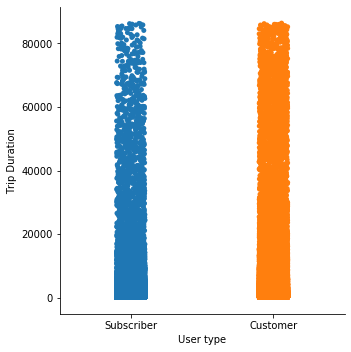

In [5]:
sb.catplot(x="user_type", y="duration_sec", data=Ford)
plt.xlabel('User type')
plt.ylabel('Trip Duration');

# 2- What is the top 10 station name in Subscriber and the number of trips?
#### The top Stations in customer & subscriber almost had 3000 trips. 

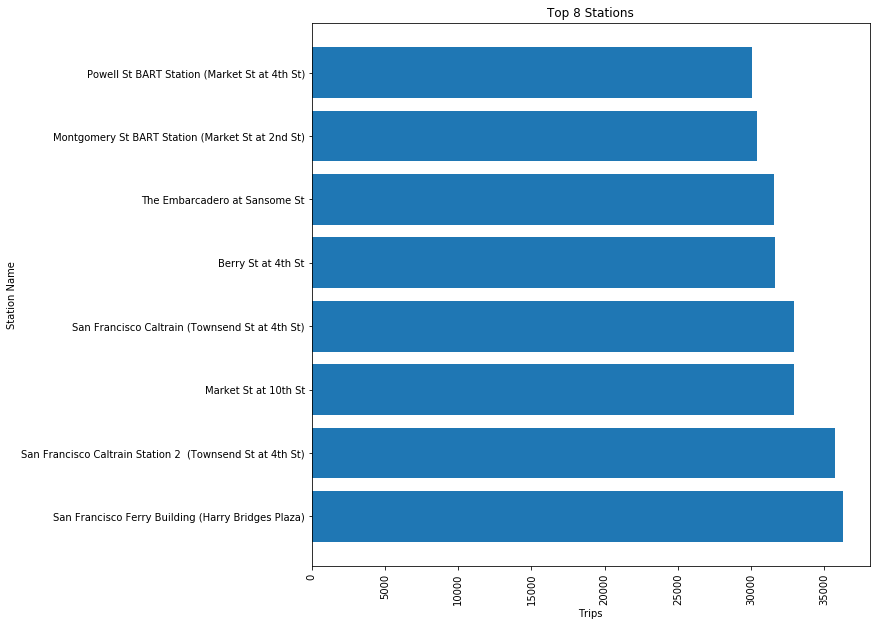

In [6]:
freq_station = Ford.start_station_name.value_counts()
y = freq_station.values[0:8] 
x = freq_station.index[0:8]

plt.figure(figsize = [10, 10])
df_sub = Ford.start_station_name.value_counts()
base_color = sb.color_palette()[0]
plt.barh(x,df_sub[x],color=base_color)

plt.xticks(rotation = 90)
plt.title('Top 8 Stations')
plt.xlabel('Trips')
plt.ylabel('Station Name');

# 3-  is the users take the same bike?
#### As what is shown in the gragh the number of bike id was equel with user type and i think the answer Yes.

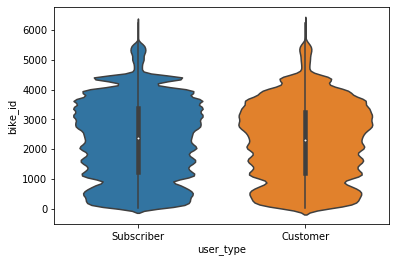

In [7]:
sb.violinplot(data = Ford, x = 'user_type', y = 'bike_id')

# 4- What is the most interactive month among Customer and Subscriber?
### As what is shown in the both gragh the all months were high in percentage of trips during the year. To be specfic the most interactive month in subscriber was October . in other hand with Customer was July.

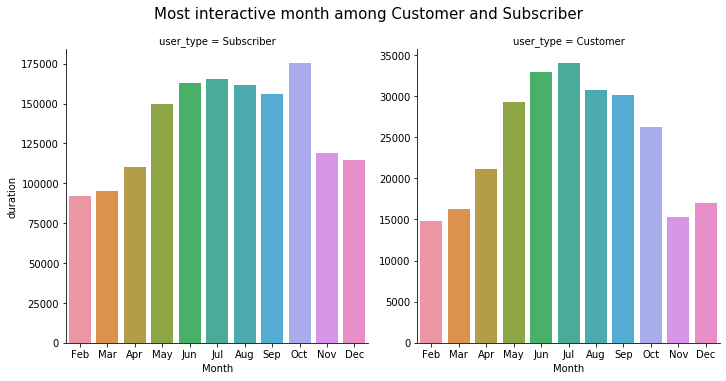

In [8]:
graph = sb.catplot(data=Ford, x='month', col="user_type",kind='count',sharey = False)
graph.fig.suptitle('Most interactive month among Customer and Subscriber ', fontsize=15,y=1.05)
graph.set_axis_labels(x_var="Month", y_var="duration")

# 5- What is most interactive day among Customer and Subscriber 
### As what is shown in the gragh the most interactive day in Subscriber was the weekdays ( from Mon till Thu ) compared to the weekend ( Fri and Sat )with 250000 .In customer the numebr of trips were high in weekend (Sat and Sun) with 50000

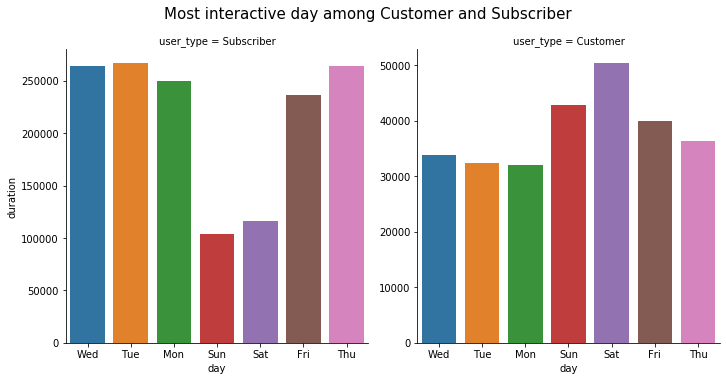

In [9]:
graph1 = sb.catplot(data=Ford, x='day', col="user_type",kind='count',sharey = False)

graph1.fig.suptitle('Most interactive day among Customer and Subscriber ', fontsize=15,y=1.05)
graph1.set_axis_labels(x_var="day", y_var="duration")

# 6- Who is have more duration time in trips??
#### As what is shown the Customer is higher than subscriber.

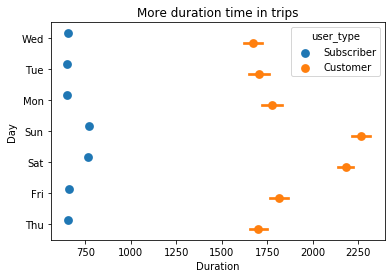

In [10]:
ax = sb.pointplot(data = Ford, x = 'duration_sec', y = 'day', hue = 'user_type',
                  dodge = 0.3, linestyles = "")

plt.title("More duration time in trips")
plt.xlabel("Duration")
plt.ylabel("Day");

### Summary
### As what is shown the customer is the most intractive user with trips and especially the longest one with duration in second almost 80000.. Also the months were high in percentage of trips during the year. To be specfic the most interactive month in subscriber was October .In other hand with Customer was July.The day was most interactive in Subscriber was the weekdays (Mon till Thu ) compared to the weekend ( Fri and Sat )with 250000 .In customer the numebr of trips were high in weekend (Sat and Sun) with 50000.